#  K-means and  cluster 2D data points.
### Ghaida'a Shtayeh 12/5/21

* librares needed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* read file :

In [21]:
df = pd.read_csv('ch1ex1.csv')
points = np.array(df)
df.head()


,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


* kmeans function :


In [22]:
def k_means(data1, num_clus):
    updated_centers =[]
    centers = np.random.randint(0,len(data1), num_clus)
    centers = data1[centers, :]
    while True:
        distance = []
        for each_center in centers:
            tmp_distance = np.sqrt(np.sum((data1 - each_center)**2, axis=1))
            distance.append(tmp_distance)
            
        x, label = np.where(np.transpose(distance == np.min(distance, axis=0)))      
        # Find center of mass for each cluster
        updated_centers = centers
        centers = []
        for i in range(num_clus):    
            centers.append(data1[label == i, :].mean(axis=0))
            
        if np.array_equal(updated_centers, centers) == True:
            break
        
            
    my_array = np.array(centers)

    return label, my_array

* function call

In [23]:
labels , center =  k_means(points,3)
center

array([[ 1.01378685,  0.98288627],
       [-1.57568905, -0.22531944],
       [ 0.18034887, -0.81701955]])

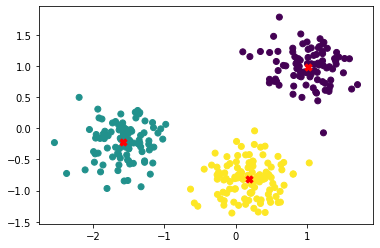

In [24]:
plt.scatter(points[:,0], points[:,1], c=labels)
plt.scatter(center[:,0], center[:,1], marker='X', s=50 , color='red')
plt.show()

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3).fit(points)
labels = model.predict(points)
xs = points[:,0]
ys = points[:,1]
centers = model.cluster_centers_
centers


array([[-1.57568905, -0.22531944],
       [ 0.18034887, -0.81701955],
       [ 1.01378685,  0.98288627]])

In [26]:
centroids_x = centers[:,0]
centroids_y = centers[:,1]

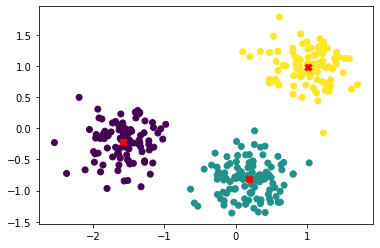

In [27]:
plt.scatter(xs, ys, c=labels)
plt.scatter(centroids_x, centroids_y, marker='X', s=50 , color='red')
plt.show()